## Importando Bibliotecas

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as plt
import numpy as np
from scipy.io.arff import loadarff
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np
from scipy import sparse
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score

## Abrindo Arquivo

In [2]:
raw_data = loadarff('emotions.arff')
df_data = pd.DataFrame(raw_data[0])

## Exibindo Informações do DataSet

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 78 columns):
Mean_Acc1298_Mean_Mem40_Centroid    593 non-null float64
Mean_Acc1298_Mean_Mem40_Rolloff     593 non-null float64
Mean_Acc1298_Mean_Mem40_Flux        593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_0      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_1      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_2      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_3      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_4      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_5      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_6      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_7      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_8      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_9      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_10     593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_11     593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_12     593 

## Conforme Visto, o DataSet não apresenta nenhum valor NULL, uma vez que o mesmo contém 593 instâncias e em todas, há 593 non-null 

In [4]:
pd.set_option('display.max_columns', None)
display(df_data.head(1))

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,Mean_Acc1298_Mean_Mem40_MFCC_7,Mean_Acc1298_Mean_Mem40_MFCC_8,Mean_Acc1298_Mean_Mem40_MFCC_9,Mean_Acc1298_Mean_Mem40_MFCC_10,Mean_Acc1298_Mean_Mem40_MFCC_11,Mean_Acc1298_Mean_Mem40_MFCC_12,Mean_Acc1298_Std_Mem40_Centroid,Mean_Acc1298_Std_Mem40_Rolloff,Mean_Acc1298_Std_Mem40_Flux,Mean_Acc1298_Std_Mem40_MFCC_0,Mean_Acc1298_Std_Mem40_MFCC_1,Mean_Acc1298_Std_Mem40_MFCC_2,Mean_Acc1298_Std_Mem40_MFCC_3,Mean_Acc1298_Std_Mem40_MFCC_4,Mean_Acc1298_Std_Mem40_MFCC_5,Mean_Acc1298_Std_Mem40_MFCC_6,Mean_Acc1298_Std_Mem40_MFCC_7,Mean_Acc1298_Std_Mem40_MFCC_8,Mean_Acc1298_Std_Mem40_MFCC_9,Mean_Acc1298_Std_Mem40_MFCC_10,Mean_Acc1298_Std_Mem40_MFCC_11,Mean_Acc1298_Std_Mem40_MFCC_12,Std_Acc1298_Mean_Mem40_Centroid,Std_Acc1298_Mean_Mem40_Rolloff,Std_Acc1298_Mean_Mem40_Flux,Std_Acc1298_Mean_Mem40_MFCC_0,Std_Acc1298_Mean_Mem40_MFCC_1,Std_Acc1298_Mean_Mem40_MFCC_2,Std_Acc1298_Mean_Mem40_MFCC_3,Std_Acc1298_Mean_Mem40_MFCC_4,Std_Acc1298_Mean_Mem40_MFCC_5,Std_Acc1298_Mean_Mem40_MFCC_6,Std_Acc1298_Mean_Mem40_MFCC_7,Std_Acc1298_Mean_Mem40_MFCC_8,Std_Acc1298_Mean_Mem40_MFCC_9,Std_Acc1298_Mean_Mem40_MFCC_10,Std_Acc1298_Mean_Mem40_MFCC_11,Std_Acc1298_Mean_Mem40_MFCC_12,Std_Acc1298_Std_Mem40_Centroid,Std_Acc1298_Std_Mem40_Rolloff,Std_Acc1298_Std_Mem40_Flux,Std_Acc1298_Std_Mem40_MFCC_0,Std_Acc1298_Std_Mem40_MFCC_1,Std_Acc1298_Std_Mem40_MFCC_2,Std_Acc1298_Std_Mem40_MFCC_3,Std_Acc1298_Std_Mem40_MFCC_4,Std_Acc1298_Std_Mem40_MFCC_5,Std_Acc1298_Std_Mem40_MFCC_6,Std_Acc1298_Std_Mem40_MFCC_7,Std_Acc1298_Std_Mem40_MFCC_8,Std_Acc1298_Std_Mem40_MFCC_9,Std_Acc1298_Std_Mem40_MFCC_10,Std_Acc1298_Std_Mem40_MFCC_11,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.03716,0.804065,1.301409,0.558576,0.672063,0.783788,0.76664,0.458712,0.530384,0.812429,0.028851,0.129039,0.039614,5.762173,1.636819,1.170034,1.051511,0.764163,0.642705,0.617868,0.510265,0.566213,0.509149,0.477275,0.505073,0.463535,0.013519,0.050591,0.009025,8.156257,1.077167,0.624711,0.810244,0.399568,0.279947,0.314215,0.231439,0.345401,0.285389,0.210613,0.321896,0.290551,0.022774,0.095801,0.015057,4.748694,0.536378,0.296306,0.27321,0.1758,0.105508,0.168246,0.115849,0.13602,0.110514,0.100517,0.11863,0.094923,0.051035,68.0,0.014937,136.0,2.0,0.245457,0.105065,0.405399,b'0',b'1',b'1',b'0',b'0',b'0'


## Exibindo Informações Estatísticas

In [5]:
#df_data.describe()
pd.DataFrame([df_data.min(), df_data.max()], index = ['Min', 'Max'])

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,Mean_Acc1298_Mean_Mem40_MFCC_7,Mean_Acc1298_Mean_Mem40_MFCC_8,Mean_Acc1298_Mean_Mem40_MFCC_9,Mean_Acc1298_Mean_Mem40_MFCC_10,Mean_Acc1298_Mean_Mem40_MFCC_11,Mean_Acc1298_Mean_Mem40_MFCC_12,Mean_Acc1298_Std_Mem40_Centroid,Mean_Acc1298_Std_Mem40_Rolloff,Mean_Acc1298_Std_Mem40_Flux,Mean_Acc1298_Std_Mem40_MFCC_0,Mean_Acc1298_Std_Mem40_MFCC_1,Mean_Acc1298_Std_Mem40_MFCC_2,Mean_Acc1298_Std_Mem40_MFCC_3,Mean_Acc1298_Std_Mem40_MFCC_4,Mean_Acc1298_Std_Mem40_MFCC_5,Mean_Acc1298_Std_Mem40_MFCC_6,Mean_Acc1298_Std_Mem40_MFCC_7,Mean_Acc1298_Std_Mem40_MFCC_8,Mean_Acc1298_Std_Mem40_MFCC_9,Mean_Acc1298_Std_Mem40_MFCC_10,Mean_Acc1298_Std_Mem40_MFCC_11,Mean_Acc1298_Std_Mem40_MFCC_12,Std_Acc1298_Mean_Mem40_Centroid,Std_Acc1298_Mean_Mem40_Rolloff,Std_Acc1298_Mean_Mem40_Flux,Std_Acc1298_Mean_Mem40_MFCC_0,Std_Acc1298_Mean_Mem40_MFCC_1,Std_Acc1298_Mean_Mem40_MFCC_2,Std_Acc1298_Mean_Mem40_MFCC_3,Std_Acc1298_Mean_Mem40_MFCC_4,Std_Acc1298_Mean_Mem40_MFCC_5,Std_Acc1298_Mean_Mem40_MFCC_6,Std_Acc1298_Mean_Mem40_MFCC_7,Std_Acc1298_Mean_Mem40_MFCC_8,Std_Acc1298_Mean_Mem40_MFCC_9,Std_Acc1298_Mean_Mem40_MFCC_10,Std_Acc1298_Mean_Mem40_MFCC_11,Std_Acc1298_Mean_Mem40_MFCC_12,Std_Acc1298_Std_Mem40_Centroid,Std_Acc1298_Std_Mem40_Rolloff,Std_Acc1298_Std_Mem40_Flux,Std_Acc1298_Std_Mem40_MFCC_0,Std_Acc1298_Std_Mem40_MFCC_1,Std_Acc1298_Std_Mem40_MFCC_2,Std_Acc1298_Std_Mem40_MFCC_3,Std_Acc1298_Std_Mem40_MFCC_4,Std_Acc1298_Std_Mem40_MFCC_5,Std_Acc1298_Std_Mem40_MFCC_6,Std_Acc1298_Std_Mem40_MFCC_7,Std_Acc1298_Std_Mem40_MFCC_8,Std_Acc1298_Std_Mem40_MFCC_9,Std_Acc1298_Std_Mem40_MFCC_10,Std_Acc1298_Std_Mem40_MFCC_11,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
Min,0.010201,0.038286,0.070932,-99.090802,0.051474,-2.277307,-0.604609,-1.143864,-0.237114,-0.444623,-0.895966,-0.451919,-0.294770,-0.258025,-0.394065,-0.129515,0.006918,0.017434,0.025297,1.665689,0.544490,0.426085,0.436355,0.343973,0.376085,0.329479,0.322254,0.327975,0.296855,0.297832,0.281625,0.273264,0.010574,0.018333,0.005696,1.103874,0.181559,0.107836,0.079273,0.055489,0.040192,0.048815,0.068473,0.055301,0.057608,0.048231,0.041973,0.033739,0.008712,0.015678,0.009090,1.908520,0.105014,0.048375,0.052660,0.034480,0.039299,0.024210,0.036153,0.032399,0.035843,0.038015,0.032472,0.031945,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Max,0.195412,0.698277,0.159460,-56.297652,12.069754,3.910873,4.382370,2.252710,2.358098,1.484489,1.722420,1.846221,1.064865,1.290063,1.876704,1.246864,0.168399,0.471795,0.116190,15.262381,3.664476,2.045210,1.491016,1.321038,1.016693,0.825064,0.870778,1.098111,0.842697,0.852488,0.772496,1.001184,0.117437,0.234718,0.022730,13.447154,2.925425,2.202609,1.472541,1.025277,1.038158,1.155625,1.334833,1.729741,1.169477,1.281840,1.181478,1.809666,0.063173,0.186134,0.032048,6.536928,1.046212,0.618704,0.543927,0.415798,0.271085,0.241432,0.304417,0.411033,0.296556,0.355242,0.471506,0.415202,1.598533,115.0,1.762948,237.0,3.0,1.795128,1.797765,3.422899,1.0,1.0,1.0,1.0,1.0,1.0


## Conforme Mostra os dados, As colunas apresentam valores de minimo e máximo diferentes, o que indica a necessidade de normalização

## Normalizando As Colunas Númericas

In [6]:
normalizing_df = pd.DataFrame()
numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeris = df_data.select_dtypes(numeric_types)
for key in df_numeris:
    normalized_column = (df_numeris[key] - df_numeris[key].min())/(df_numeris[key].max() - df_numeris[key].min())
    normalizing_df[key] = normalized_column

In [7]:
df_normalized = pd.concat([normalizing_df, df_data.select_dtypes('object')], axis=1)
df_normalized.head(1)

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,Mean_Acc1298_Mean_Mem40_MFCC_7,Mean_Acc1298_Mean_Mem40_MFCC_8,Mean_Acc1298_Mean_Mem40_MFCC_9,Mean_Acc1298_Mean_Mem40_MFCC_10,Mean_Acc1298_Mean_Mem40_MFCC_11,Mean_Acc1298_Mean_Mem40_MFCC_12,Mean_Acc1298_Std_Mem40_Centroid,Mean_Acc1298_Std_Mem40_Rolloff,Mean_Acc1298_Std_Mem40_Flux,Mean_Acc1298_Std_Mem40_MFCC_0,Mean_Acc1298_Std_Mem40_MFCC_1,Mean_Acc1298_Std_Mem40_MFCC_2,Mean_Acc1298_Std_Mem40_MFCC_3,Mean_Acc1298_Std_Mem40_MFCC_4,Mean_Acc1298_Std_Mem40_MFCC_5,Mean_Acc1298_Std_Mem40_MFCC_6,Mean_Acc1298_Std_Mem40_MFCC_7,Mean_Acc1298_Std_Mem40_MFCC_8,Mean_Acc1298_Std_Mem40_MFCC_9,Mean_Acc1298_Std_Mem40_MFCC_10,Mean_Acc1298_Std_Mem40_MFCC_11,Mean_Acc1298_Std_Mem40_MFCC_12,Std_Acc1298_Mean_Mem40_Centroid,Std_Acc1298_Mean_Mem40_Rolloff,Std_Acc1298_Mean_Mem40_Flux,Std_Acc1298_Mean_Mem40_MFCC_0,Std_Acc1298_Mean_Mem40_MFCC_1,Std_Acc1298_Mean_Mem40_MFCC_2,Std_Acc1298_Mean_Mem40_MFCC_3,Std_Acc1298_Mean_Mem40_MFCC_4,Std_Acc1298_Mean_Mem40_MFCC_5,Std_Acc1298_Mean_Mem40_MFCC_6,Std_Acc1298_Mean_Mem40_MFCC_7,Std_Acc1298_Mean_Mem40_MFCC_8,Std_Acc1298_Mean_Mem40_MFCC_9,Std_Acc1298_Mean_Mem40_MFCC_10,Std_Acc1298_Mean_Mem40_MFCC_11,Std_Acc1298_Mean_Mem40_MFCC_12,Std_Acc1298_Std_Mem40_Centroid,Std_Acc1298_Std_Mem40_Rolloff,Std_Acc1298_Std_Mem40_Flux,Std_Acc1298_Std_Mem40_MFCC_0,Std_Acc1298_Std_Mem40_MFCC_1,Std_Acc1298_Std_Mem40_MFCC_2,Std_Acc1298_Std_Mem40_MFCC_3,Std_Acc1298_Std_Mem40_MFCC_4,Std_Acc1298_Std_Mem40_MFCC_5,Std_Acc1298_Std_Mem40_MFCC_6,Std_Acc1298_Std_Mem40_MFCC_7,Std_Acc1298_Std_Mem40_MFCC_8,Std_Acc1298_Std_Mem40_MFCC_9,Std_Acc1298_Std_Mem40_MFCC_10,Std_Acc1298_Std_Mem40_MFCC_11,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.132498,0.077848,0.229227,0.602629,0.512861,0.467404,0.529733,0.573498,0.592831,0.520031,0.598853,0.537699,0.780658,0.462982,0.407108,0.684364,0.135824,0.245631,0.157515,0.301285,0.350107,0.459476,0.583274,0.430053,0.416198,0.581916,0.342758,0.309345,0.388929,0.323521,0.455207,0.26139,0.027559,0.149077,0.195433,0.571354,0.326404,0.246745,0.524645,0.354798,0.240244,0.239788,0.128689,0.173252,0.204863,0.131632,0.245653,0.144607,0.258203,0.470051,0.259909,0.61364,0.458314,0.434716,0.448941,0.370609,0.285647,0.663082,0.29708,0.273671,0.286411,0.197026,0.196244,0.164323,0.031926,0.591304,0.008473,0.57384,0.666667,0.136735,0.058442,0.118437,b'0',b'1',b'1',b'0',b'0',b'0'


## Conforme pode ser observado, todas as colunas foram normalizada, estão com valores entre 0 e 1

In [8]:
pd.DataFrame([df_normalized.min(), df_normalized.max()], index = ['Min', 'Max'])

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,Mean_Acc1298_Mean_Mem40_MFCC_7,Mean_Acc1298_Mean_Mem40_MFCC_8,Mean_Acc1298_Mean_Mem40_MFCC_9,Mean_Acc1298_Mean_Mem40_MFCC_10,Mean_Acc1298_Mean_Mem40_MFCC_11,Mean_Acc1298_Mean_Mem40_MFCC_12,Mean_Acc1298_Std_Mem40_Centroid,Mean_Acc1298_Std_Mem40_Rolloff,Mean_Acc1298_Std_Mem40_Flux,Mean_Acc1298_Std_Mem40_MFCC_0,Mean_Acc1298_Std_Mem40_MFCC_1,Mean_Acc1298_Std_Mem40_MFCC_2,Mean_Acc1298_Std_Mem40_MFCC_3,Mean_Acc1298_Std_Mem40_MFCC_4,Mean_Acc1298_Std_Mem40_MFCC_5,Mean_Acc1298_Std_Mem40_MFCC_6,Mean_Acc1298_Std_Mem40_MFCC_7,Mean_Acc1298_Std_Mem40_MFCC_8,Mean_Acc1298_Std_Mem40_MFCC_9,Mean_Acc1298_Std_Mem40_MFCC_10,Mean_Acc1298_Std_Mem40_MFCC_11,Mean_Acc1298_Std_Mem40_MFCC_12,Std_Acc1298_Mean_Mem40_Centroid,Std_Acc1298_Mean_Mem40_Rolloff,Std_Acc1298_Mean_Mem40_Flux,Std_Acc1298_Mean_Mem40_MFCC_0,Std_Acc1298_Mean_Mem40_MFCC_1,Std_Acc1298_Mean_Mem40_MFCC_2,Std_Acc1298_Mean_Mem40_MFCC_3,Std_Acc1298_Mean_Mem40_MFCC_4,Std_Acc1298_Mean_Mem40_MFCC_5,Std_Acc1298_Mean_Mem40_MFCC_6,Std_Acc1298_Mean_Mem40_MFCC_7,Std_Acc1298_Mean_Mem40_MFCC_8,Std_Acc1298_Mean_Mem40_MFCC_9,Std_Acc1298_Mean_Mem40_MFCC_10,Std_Acc1298_Mean_Mem40_MFCC_11,Std_Acc1298_Mean_Mem40_MFCC_12,Std_Acc1298_Std_Mem40_Centroid,Std_Acc1298_Std_Mem40_Rolloff,Std_Acc1298_Std_Mem40_Flux,Std_Acc1298_Std_Mem40_MFCC_0,Std_Acc1298_Std_Mem40_MFCC_1,Std_Acc1298_Std_Mem40_MFCC_2,Std_Acc1298_Std_Mem40_MFCC_3,Std_Acc1298_Std_Mem40_MFCC_4,Std_Acc1298_Std_Mem40_MFCC_5,Std_Acc1298_Std_Mem40_MFCC_6,Std_Acc1298_Std_Mem40_MFCC_7,Std_Acc1298_Std_Mem40_MFCC_8,Std_Acc1298_Std_Mem40_MFCC_9,Std_Acc1298_Std_Mem40_MFCC_10,Std_Acc1298_Std_Mem40_MFCC_11,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
Min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
df_normalized_only_numeric_values = df_normalized.select_dtypes(numeric_types)
df_normalized_only_numeric_values.head(1)

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,Mean_Acc1298_Mean_Mem40_MFCC_7,Mean_Acc1298_Mean_Mem40_MFCC_8,Mean_Acc1298_Mean_Mem40_MFCC_9,Mean_Acc1298_Mean_Mem40_MFCC_10,Mean_Acc1298_Mean_Mem40_MFCC_11,Mean_Acc1298_Mean_Mem40_MFCC_12,Mean_Acc1298_Std_Mem40_Centroid,Mean_Acc1298_Std_Mem40_Rolloff,Mean_Acc1298_Std_Mem40_Flux,Mean_Acc1298_Std_Mem40_MFCC_0,Mean_Acc1298_Std_Mem40_MFCC_1,Mean_Acc1298_Std_Mem40_MFCC_2,Mean_Acc1298_Std_Mem40_MFCC_3,Mean_Acc1298_Std_Mem40_MFCC_4,Mean_Acc1298_Std_Mem40_MFCC_5,Mean_Acc1298_Std_Mem40_MFCC_6,Mean_Acc1298_Std_Mem40_MFCC_7,Mean_Acc1298_Std_Mem40_MFCC_8,Mean_Acc1298_Std_Mem40_MFCC_9,Mean_Acc1298_Std_Mem40_MFCC_10,Mean_Acc1298_Std_Mem40_MFCC_11,Mean_Acc1298_Std_Mem40_MFCC_12,Std_Acc1298_Mean_Mem40_Centroid,Std_Acc1298_Mean_Mem40_Rolloff,Std_Acc1298_Mean_Mem40_Flux,Std_Acc1298_Mean_Mem40_MFCC_0,Std_Acc1298_Mean_Mem40_MFCC_1,Std_Acc1298_Mean_Mem40_MFCC_2,Std_Acc1298_Mean_Mem40_MFCC_3,Std_Acc1298_Mean_Mem40_MFCC_4,Std_Acc1298_Mean_Mem40_MFCC_5,Std_Acc1298_Mean_Mem40_MFCC_6,Std_Acc1298_Mean_Mem40_MFCC_7,Std_Acc1298_Mean_Mem40_MFCC_8,Std_Acc1298_Mean_Mem40_MFCC_9,Std_Acc1298_Mean_Mem40_MFCC_10,Std_Acc1298_Mean_Mem40_MFCC_11,Std_Acc1298_Mean_Mem40_MFCC_12,Std_Acc1298_Std_Mem40_Centroid,Std_Acc1298_Std_Mem40_Rolloff,Std_Acc1298_Std_Mem40_Flux,Std_Acc1298_Std_Mem40_MFCC_0,Std_Acc1298_Std_Mem40_MFCC_1,Std_Acc1298_Std_Mem40_MFCC_2,Std_Acc1298_Std_Mem40_MFCC_3,Std_Acc1298_Std_Mem40_MFCC_4,Std_Acc1298_Std_Mem40_MFCC_5,Std_Acc1298_Std_Mem40_MFCC_6,Std_Acc1298_Std_Mem40_MFCC_7,Std_Acc1298_Std_Mem40_MFCC_8,Std_Acc1298_Std_Mem40_MFCC_9,Std_Acc1298_Std_Mem40_MFCC_10,Std_Acc1298_Std_Mem40_MFCC_11,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3
0,0.132498,0.077848,0.229227,0.602629,0.512861,0.467404,0.529733,0.573498,0.592831,0.520031,0.598853,0.537699,0.780658,0.462982,0.407108,0.684364,0.135824,0.245631,0.157515,0.301285,0.350107,0.459476,0.583274,0.430053,0.416198,0.581916,0.342758,0.309345,0.388929,0.323521,0.455207,0.26139,0.027559,0.149077,0.195433,0.571354,0.326404,0.246745,0.524645,0.354798,0.240244,0.239788,0.128689,0.173252,0.204863,0.131632,0.245653,0.144607,0.258203,0.470051,0.259909,0.61364,0.458314,0.434716,0.448941,0.370609,0.285647,0.663082,0.29708,0.273671,0.286411,0.197026,0.196244,0.164323,0.031926,0.591304,0.008473,0.57384,0.666667,0.136735,0.058442,0.118437


## Obtendo Matriz de Correlação

In [10]:
corr_matrix = df_normalized_only_numeric_values.corr().abs()

In [11]:
corr_matrix.style.background_gradient('coolwarm').set_precision(2)

## Eliminando Colunas com alta correlação, foi escolhido remover uma das colunas com correlação maior que 0.80

In [12]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
#to_drop

In [13]:
df_correlated = df_normalized.drop(df_normalized[to_drop], axis = 1)
df_correlated.head(1)

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,Mean_Acc1298_Mean_Mem40_MFCC_7,Mean_Acc1298_Mean_Mem40_MFCC_8,Mean_Acc1298_Mean_Mem40_MFCC_9,Mean_Acc1298_Mean_Mem40_MFCC_10,Mean_Acc1298_Mean_Mem40_MFCC_11,Mean_Acc1298_Mean_Mem40_MFCC_12,Mean_Acc1298_Std_Mem40_Centroid,Mean_Acc1298_Std_Mem40_MFCC_0,Mean_Acc1298_Std_Mem40_MFCC_1,Mean_Acc1298_Std_Mem40_MFCC_2,Mean_Acc1298_Std_Mem40_MFCC_3,Mean_Acc1298_Std_Mem40_MFCC_8,Mean_Acc1298_Std_Mem40_MFCC_9,Std_Acc1298_Mean_Mem40_Centroid,Std_Acc1298_Mean_Mem40_Rolloff,Std_Acc1298_Mean_Mem40_Flux,Std_Acc1298_Mean_Mem40_MFCC_0,Std_Acc1298_Mean_Mem40_MFCC_1,Std_Acc1298_Mean_Mem40_MFCC_2,Std_Acc1298_Mean_Mem40_MFCC_3,Std_Acc1298_Mean_Mem40_MFCC_4,Std_Acc1298_Mean_Mem40_MFCC_5,Std_Acc1298_Mean_Mem40_MFCC_6,Std_Acc1298_Mean_Mem40_MFCC_7,Std_Acc1298_Mean_Mem40_MFCC_9,Std_Acc1298_Std_Mem40_Centroid,Std_Acc1298_Std_Mem40_Rolloff,Std_Acc1298_Std_Mem40_Flux,Std_Acc1298_Std_Mem40_MFCC_0,Std_Acc1298_Std_Mem40_MFCC_1,Std_Acc1298_Std_Mem40_MFCC_2,Std_Acc1298_Std_Mem40_MFCC_3,Std_Acc1298_Std_Mem40_MFCC_4,Std_Acc1298_Std_Mem40_MFCC_5,Std_Acc1298_Std_Mem40_MFCC_6,Std_Acc1298_Std_Mem40_MFCC_7,Std_Acc1298_Std_Mem40_MFCC_8,Std_Acc1298_Std_Mem40_MFCC_9,Std_Acc1298_Std_Mem40_MFCC_10,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakBPM,BH_HighLowRatio,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.132498,0.077848,0.229227,0.602629,0.512861,0.467404,0.529733,0.573498,0.592831,0.520031,0.598853,0.537699,0.780658,0.462982,0.407108,0.684364,0.135824,0.301285,0.350107,0.459476,0.583274,0.309345,0.388929,0.027559,0.149077,0.195433,0.571354,0.326404,0.246745,0.524645,0.354798,0.240244,0.239788,0.128689,0.204863,0.258203,0.470051,0.259909,0.61364,0.458314,0.434716,0.448941,0.370609,0.285647,0.663082,0.29708,0.273671,0.286411,0.197026,0.031926,0.591304,0.57384,0.666667,b'0',b'1',b'1',b'0',b'0',b'0'


## Verificando Balanceamento das classes

In [14]:
df_labels = df_correlated.select_dtypes('object')
labels_count = 1
labels_dict = { }
labels = []

In [15]:
histogram_count = {}
for key in df_labels:
    labels_dict[key] = labels_count
    labels_count += 1
    labels.append(key)
    histogram_count[key] = 0
    for values in df_labels[key]:
        if values == b'1' :
            histogram_count[key] += 1
df_histogram = pd.DataFrame([histogram_count])
df_histogram

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,173,166,264,148,168,189


## Observa-se no gráfico abaixo que há um desbalanceamento das classes, principalmente no que tange a classe 'relaxing-calm'

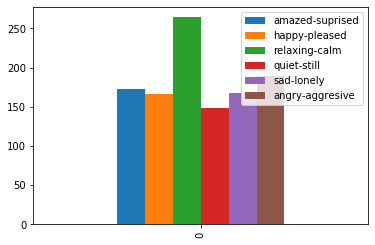

In [16]:
df_histogram.plot.bar()

## Realizando Balanceamento das Classes

Durante tentativa de balanceamento das classes, foi observado que por se tratar de multi-label, ou seja, uma instância pode está associada a mais de uma label, ao retirar uma instância que pertence a label x poderia estar retirando de outra que pertence a label Y, e ao se retirar uma que pertence unicamente a label X, poderia estar perdendo informações relevantes apenas a label X, dado os motivos apresentados, foi tomada a decissão de não balancear o dataset, e tomada a decisão apresentada abaixo.

## Para contornar esse problema, será feito um treinamento conhecido como One Vs All, que consiste em testar uma instância para todas as classes e poder dar mais de um label para a mesma.

# Outliers

Por não saber o significado das colunas, e como as mesmas não possuem um desvio padrão muito relevante, foi tomada a decisão de não realizar a análise de outliers.

## Separando as Instancias de Teste e Treino

In [17]:
train = df_normalized.sample(frac=0.80)
test = df_normalized.drop(index = train.index)

In [18]:
X_train = train.iloc[:, :72]
Y_train = train.iloc[:,:71:-1]
X_test = test.iloc[:, :72]
Y_test = test.iloc[:,:71:-1]

## TREINAMENTO COM SVM

## Fornecendo dados ao Classificador

In [19]:
oneVsRest = OneVsRestClassifier(SVC(kernel = 'linear',  C = 0.5)).fit(X_train, Y_train.astype(int))

## Realizando teste para verificar Acuracia

In [20]:
y_pred = oneVsRest.predict(X_test)

## Acurácia

In [21]:
Y_test_array = Y_test.astype(int).values
sparsePred = sparse.csc_matrix(y_pred)
sparseYtest = sparse.csc_matrix(Y_test_array)
acc = accuracy_score(sparseYtest, sparsePred, normalize = True)
acc

0.2857142857142857

## Matriz de Confusão

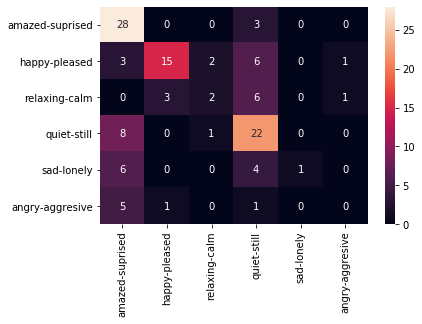

In [22]:
matrix_confusion = confusion_matrix(sparseYtest.argmax(axis=1), sparsePred.argmax(axis=1))
matrix_confusion_df = pd.DataFrame(matrix_confusion, index = labels, columns= labels)
sns.heatmap(matrix_confusion_df, annot= True)

# Acurácia Global

A acurácia global é obtida através da divisão entre todas as predições corretas pelo total de previsões feitas. È Importante destacar que a acurácia global é diferente da acurácia por instância, pois enquanto um caso que tem como resultado [1 0] e o valor previsto é [0 0], tem uma acurâcia de 0%, a acurâcia global seria de 50%, pois o modelo acertou o falso positivo.

In [23]:
tpTn = 0
sumAll = 0
for i in range(0, 6):
    for j in range(0, 6):
        if(i == j):
            tpTn += matrix_confusion[i][j]
        sumAll += matrix_confusion[i][j]
pd.DataFrame([(tpTn/sumAll).round(2)], columns = ['Acurácia'])

,Acurácia
0,0.57


## f1-Socre

A medida F1 nos da uma avaliação geral do modelo, e funciona até para casos de classes desproporcionais, pois pode medir a precisão de cada uma e gerar uma média das mesmas.

In [24]:
pd.DataFrame([f1_score(sparseYtest, sparsePred, average='micro')], columns=['f1_Score']).round(2)

,f1_Score
0,0.64


## Sensibilidade

A Sensibilidade é a proporção de casos positivos obtidos corretamente, ou seja, positivos previstos como positivos. TP/(TP+FN)

In [25]:
sensibility = []
for i in range(0, 6):
    aux_var = 0
    rowSum = 0
    for j in range(0, 6):
        if(i == j):
            aux_var = matrix_confusion[i][j]
        rowSum += matrix_confusion[i][j]
    sensibility.append(aux_var/rowSum)

In [26]:
pd.DataFrame([sensibility], columns=labels).round(2)

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.9,0.56,0.17,0.71,0.09,0.0


## Specificidade

É a proporção de casos negativos que foram previstos corretamentes, ou seja, negativos previstos como negativos. TN/(TN+FP)

tn = diagonal retirando a própria diagonal \ FP = soma de toda coluna retirando a própria /  tn(tn+fp)

In [27]:
sumDiagonal = 0
specificity = []
for i in range(0, 6):
    for j in range(0, 6):
        if(i == j):
            sumDiagonal += matrix_confusion[i][j]
for i in range(0, 6):
    sumCol = 0
    ownDig = 0
    for j in range(0, 6):
        if(i == j):
            ownDig = matrix_confusion[i][j]
        sumCol += matrix_confusion[j][i]
    tn = sumDiagonal - ownDig
    specificity.append(tn/(tn + (sumCol - ownDig)))

In [28]:
pd.DataFrame([specificity], columns=labels).round(2)

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.65,0.93,0.96,0.7,1.0,0.97
